# **Informe mundial sobre la Felicidad**
## La felicidad puntuada según la producción económica, el apoyo social, etc.

El Informe Mundial sobre la Felicidad es una encuesta histórica sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El World Happiness 2017, que **clasifica a 155 países** por sus niveles de felicidad, fue lanzado en las Naciones Unidas en un evento que celebra el Día Internacional de la Felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones del bienestar se pueden utilizar de manera efectiva para evaluar el progreso de las naciones. Los informes revisan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales de la felicidad.

In [6]:
!pip install pycountry-convert
#dataset = https://www.kaggle.com/unsdsn/world-happiness

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pycountry_convert as pc
import seaborn as sns

In [8]:
df = pd.read_csv('2019.csv', names=['Ranking','Pais','Felicidad','PIB','Soporte_Social','Expectativa_vida_saludable','Libertad_Expresion','Generosidad','Percepcion_Corrupcion'], header=0)
df.head()

,Ranking,Pais,Felicidad,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Percepcion_Corrupcion
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Text(0.5, 0, 'Generosidad')

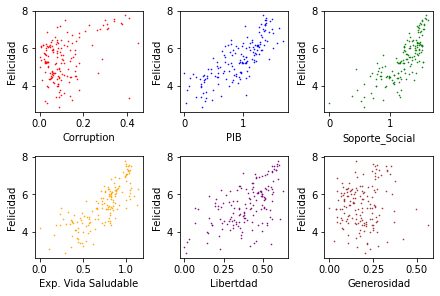

In [9]:
happy = df['Felicidad']
GDP = df['PIB']
ss = df['Soporte_Social']
health = df['Expectativa_vida_saludable']
generosity = df['Generosidad']
freedom = df['Libertad_Expresion']
corruption = df['Percepcion_Corrupcion']


width = 0.35

fig2 = plt.figure(constrained_layout=True)

spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)

# Happy 
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax1.scatter(corruption, happy, width, color='red')
f2_ax1.set_xlabel('Corruption')
f2_ax1.set_ylabel('Felicidad')

# GPD
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax2.scatter(GDP,happy, width, color='blue')
f2_ax2.set_ylabel('Felicidad')
f2_ax2.set_xlabel('PIB')

# Soporte_Social
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax3.scatter(ss,happy, width, color='green')
f2_ax3.set_ylabel('Felicidad')
f2_ax3.set_xlabel('Soporte_Social')

# Expectativa_vida_saludable
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax4.scatter(health,happy, width, color='orange')
f2_ax4.set_ylabel('Felicidad')
f2_ax4.set_xlabel('Exp. Vida Saludable')

# Libertad_Expresion
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax5.scatter(freedom,happy, width, color='purple')
f2_ax5.set_ylabel('Felicidad')
f2_ax5.set_xlabel('Libertdad')

# Generosidad
f2_ax6 = fig2.add_subplot(spec2[1, 2])
f2_ax6.scatter(generosity,happy, width, color='brown')
f2_ax6.set_ylabel('Felicidad')
f2_ax6.set_xlabel('Generosidad')

Podemos observar que el **Felicidad**, que representa el *puntaje de felicidad de un pais*, depende claramente de 3 factores:
- **PIB**; o el Producto Interno Bruto
- **Soporte_Social**: acceso a amigos y otras personas, incluida la familia, a quienes acudir en momentos de necesidad o crisis para darle un enfoque más amplio y una imagen positiva de sí mismo.
- **Expectativa_vida_saludable**; o la expectativa de vida saludable

Otro factor que vemos que tiene un impacto no tan claro, pero que igual parece tener influencia sobre el puntaje de felicidad de un pais es **Libertad_Expresion**; es decir, la libertad de tomar deciciones de vida propias.

Esta correlacion entre el puntaje de felicidad y la variables previamente mencionadas se puede apreciar con mayor claridad en la siguiente matriz, en la cual, mientras **más cerca de 1.0** este el puntaje, **más correlación existe entre las variables** que se cruzan.

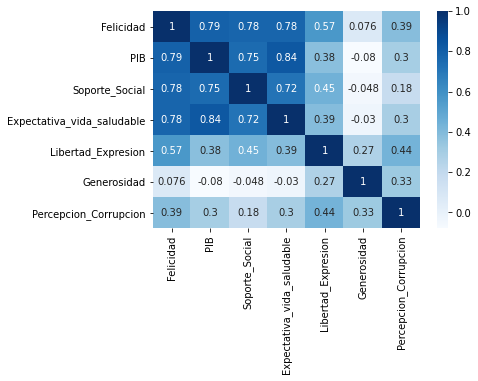

In [10]:
data = df.iloc[:,1:]
corrMatrix = data.corr()
sns.heatmap(corrMatrix, cmap = 'Blues', annot = True)
plt.show()

## Graficas Happy

In [11]:
df.head()

,Ranking,Pais,Felicidad,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Percepcion_Corrupcion
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
country_code = pc.country_name_to_country_alpha2("Panama", cn_name_format="default")
continent_name = pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_code))
continent_name

'North America'

In [13]:
def get_continent(country):
  try :
    country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    continent_name = pc.convert_continent_code_to_continent_name(
                                      pc.country_alpha2_to_continent_code(country_code)
                                      )
    return continent_name
  except:
    return None

df['Continente'] = df['Pais'].apply(get_continent)

In [14]:
df = df[['Ranking', 'Pais','Continente', 'Percepcion_Corrupcion', 'PIB',
       'Soporte_Social', 'Expectativa_vida_saludable',
       'Libertad_Expresion', 'Generosidad','Felicidad'
       ]]

In [15]:
df[df['Continente'].isna()]

,Ranking,Pais,Continente,Percepcion_Corrupcion,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Felicidad
38,39,Trinidad & Tobago,None,0.016,1.231,1.477,0.713,0.489,0.185,6.192
45,46,Kosovo,None,0.006,0.882,1.232,0.758,0.489,0.262,6.100
102,103,Congo (Brazzaville),None,0.093,0.673,0.799,0.508,0.372,0.105,4.812
109,110,Palestinian Territories,None,0.066,0.657,1.247,0.672,0.225,0.103,4.696
126,127,Congo (Kinshasa),None,0.053,0.094,1.125,0.357,0.269,0.212,4.418


Podemos notar que algunos paises quedaron sin categoria. Dejarlos sin categoría solo tendrá un impacto significativo en el puntaje de felicidad promedio en aquellos continentes o subcontinentes conformados por pocos paises, como América del Sur y Oceanía.

Uno de estos paises, **Trinidad & Tobago**, forma parte de Suramérica, que, dentro de nuestra data, solo cuenta con 10 paises. Lo más prudente será categorizarlo manualmente.


In [16]:
df.loc[38,'Pais'] = "South America"
df.loc[38,'Pais']

'South America'

Tambien revisemos que dentro los paises sin categorizar no se encuentren los paises con el puntaje de felicidad máximo y mínimo.

In [17]:
df['Felicidad'].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Felicidad, dtype: float64

### Happy Vs PIB (Producto Interno Bruto)

In [18]:
# En la variable X almacenamos lo valores de las columnas PIB y Felicidad
X = df.iloc[:, [4, -1]].values

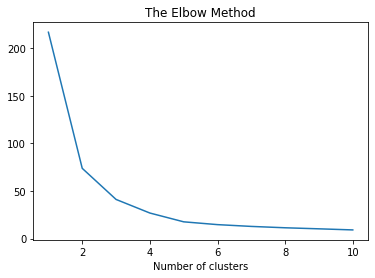

In [19]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    # La inercia se puede reconocer como una medida de la coherencia interna de los clusters.
    
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#Fit_predict -> Calcula los centroides de los clusters y predice el clusters al que debe pertecnecer cada muestra

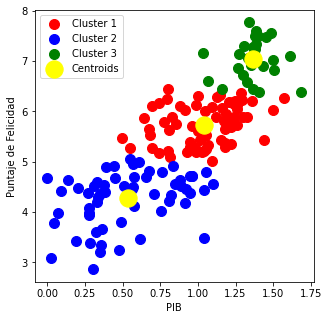

In [21]:
plt.figure(figsize=(5,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.xlabel('PIB')
plt.ylabel('Puntaje de Felicidad')

plt.legend()
plt.show()

In [57]:
data_red_gdp =  df[df['Felicidad'].isin(X[y_kmeans == 0, 1])]
data_blue_gdp = df[df['Felicidad'].isin(X[y_kmeans == 1, 1])]
data_green_gdp = df[df['Felicidad'].isin(X[y_kmeans == 2, 1])]

### Happy Vs Soporte_Social (Apoyo Social)

In [23]:
X = df.iloc[:, [5, -1]].values

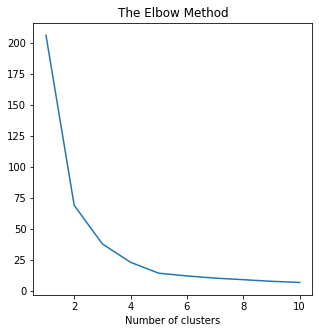

In [24]:
from sklearn.cluster import KMeans
wcss = []
fig = plt.subplots(figsize=(5,5))

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

plt.show()

In [61]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

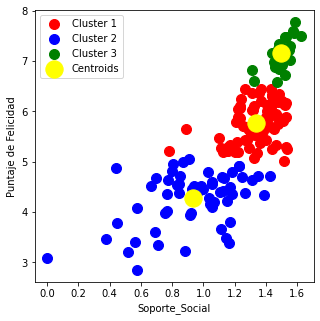

In [26]:
plt.figure(figsize=(5,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.xlabel('Soporte_Social')
plt.ylabel('Puntaje de Felicidad')

plt.legend()
plt.show()

In [55]:
data_red_ss =  df[df['Felicidad'].isin(X[y_kmeans == 0, 1])]
data_blue_ss = df[df['Felicidad'].isin(X[y_kmeans == 1, 1])]
data_green_ss = df[df['Felicidad'].isin(X[y_kmeans == 2, 1])]

### Happy Vs Expectativa_vida_saludable (Expectativa de Vida Saludable)

\- Turno de la audiencia - 

In [59]:
len(data_red_ss)

72

## Análisis de la Data - GDP y Soporte_Social

In [69]:
# Tabla con valores min y max, y número de paises

gdp = {'Cluster': ['Blue Cluster','Red Cluster','Green Cluster'],
        'Min_GPD': [
                    round(np.nanmin(data_blue_gdp['Felicidad']),2),
                    round(np.nanmin(data_red_gdp['Felicidad']),2),
                    round(np.nanmin(data_green_gdp['Felicidad']),2)
                    ],
        'Max_GPD': [
                   round(np.nanmax(data_blue_gdp['Felicidad']),2),
                   round(np.nanmax(data_red_gdp['Felicidad']),2),
                   round(np.nanmax(data_green_gdp['Felicidad']),2)
                   ],
        'Amount_Country': [
                             len(data_blue_gdp),
                             len(data_red_gdp),
                             len(data_green_gdp)
                            ]
        }

ss = {'Cluster': ['Blue Cluster','Red Cluster','Green Cluster'],
        'Min_ss': [
                    round(np.nanmin(data_blue_ss['Felicidad']),2),
                    round(np.nanmin(data_red_ss['Felicidad']),2),
                    round(np.nanmin(data_green_ss['Felicidad']),2)
                    ],
        'Max_ss': [
                   round(np.nanmax(data_blue_ss['Felicidad']),2),
                   round(np.nanmax(data_red_ss['Felicidad']),2),
                   round(np.nanmax(data_green_ss['Felicidad']),2)
                   ],
        'Amount_Country': [
                             len(data_blue_ss),
                             len(data_red_ss),
                             len(data_green_ss)
                            ]
        }

df_gdp = pd.DataFrame.from_dict(gdp)

df_ss = pd.DataFrame(ss)

print('Producto Interno Bruto\n\n',df_gdp, '\n\n\nSoporte Social\n\n', df_ss)

Producto Interno Bruto

          Cluster  Min_GPD  Max_GPD  Amount_Country
0   Blue Cluster     2.85     5.04              60
1    Red Cluster     5.01     6.45              72
2  Green Cluster     6.59     7.77              24 


Soporte Social

          Cluster  Min_ss  Max_ss  Amount_Country
0   Blue Cluster    2.85    5.04              60
1    Red Cluster    5.01    6.45              72
2  Green Cluster    6.59    7.77              24


#### Ordenando la Data por Nombre de País

In [70]:
# PIB
data_blue_gdp.sort_values(by='Pais',inplace=True)
data_red_gdp.sort_values(by='Pais',inplace=True)
data_green_gdp.sort_values(by='Pais',inplace=True)

# SS
data_blue_ss.sort_values(by='Pais',inplace=True)
data_red_ss.sort_values(by='Pais',inplace=True)
data_green_ss.sort_values(by='Pais',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

### Graficando los Países de cada cluster - GDP

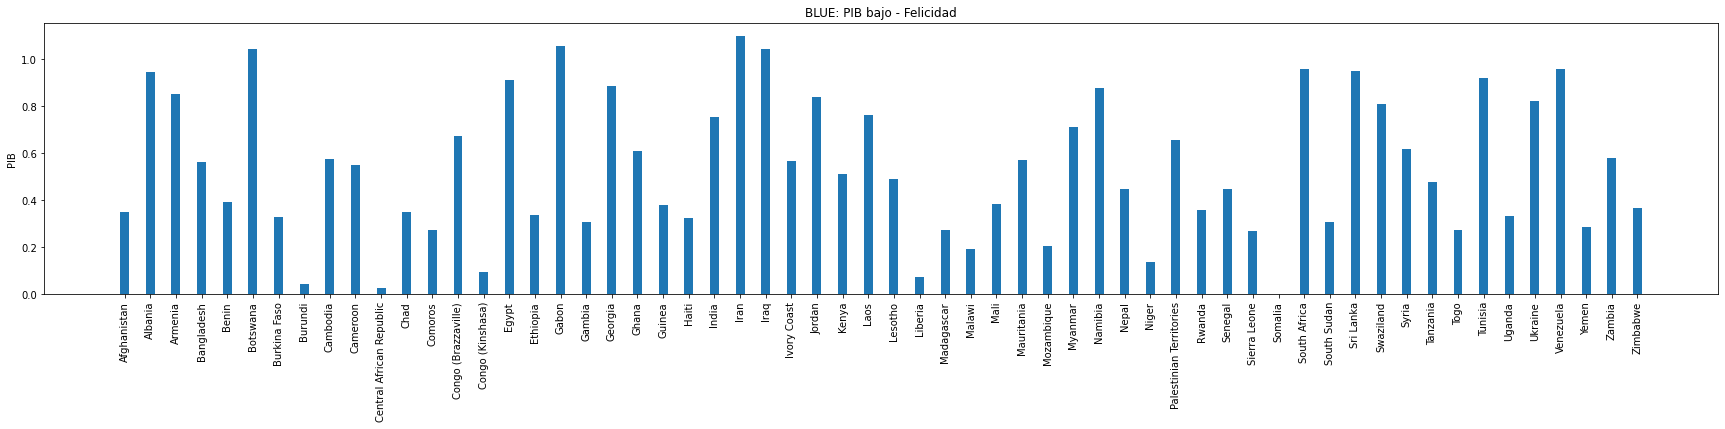

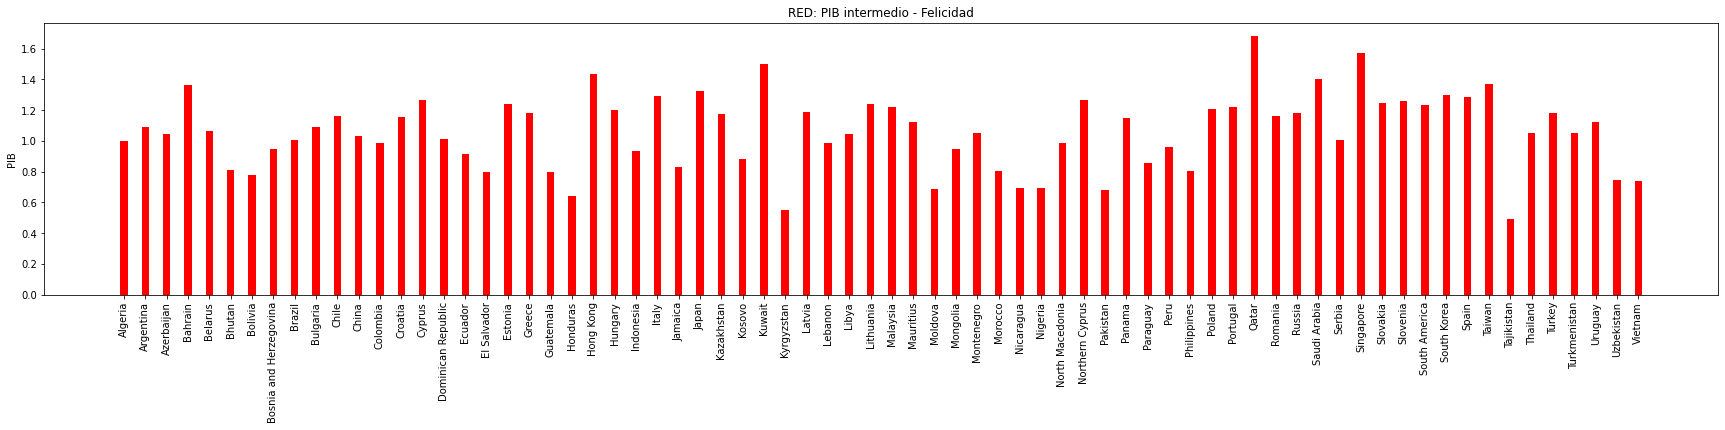

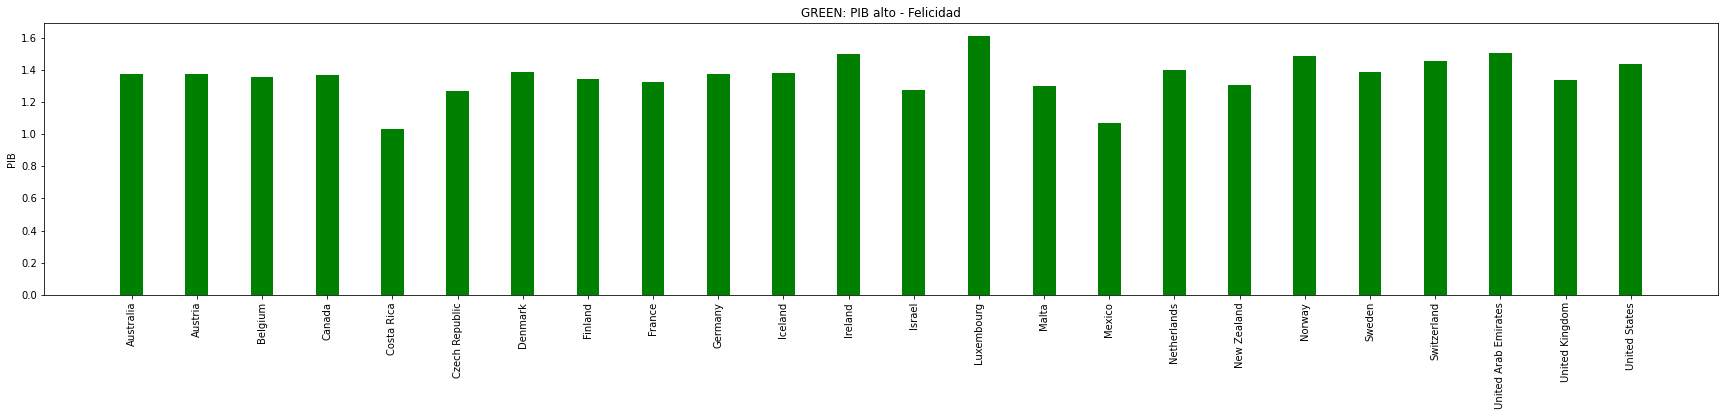

In [71]:
#BLUE
labels = data_blue_gdp['Pais']
GDP = data_blue_gdp['PIB']
width = 0.35

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='PIB')

ax.set_ylabel('PIB')
ax.set_title('BLUE: PIB bajo - Felicidad')

#RED

labels = data_red_gdp['Pais']
GDP = data_red_gdp['PIB']
width = 0.35

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='PIB', color='red')
ax.set_ylabel('PIB')
ax.set_title('RED: PIB intermedio - Felicidad')

#GREEN

labels = data_green_gdp['Pais']
GDP = data_green_gdp['PIB']
width = 0.35

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='PIB',  color='green')

ax.set_ylabel('PIB')
ax.set_title('GREEN: PIB alto - Felicidad')


plt.show()

### Continentes en cada cluster - GDP

In [31]:
#BLUE
print('Número de paises, por continente - BLUE')
print(data_blue_gdp.Continente.value_counts())
print('\n')

#RED
print('Número de paises, por continente - RED')
print(data_red_gdp.Continente.value_counts())
print('\n')

#GREEN
print('Número de paises, por continente - GREEN')
print(data_green_gdp.Continente.value_counts())
print('\n')

Número de paises, por continente - BLUE
Africa           38
Asia             15
Europe            2
South America     1
North America     1
Name: Continente, dtype: int64


Número de paises, por continente - RED
Asia             25
Europe           21
South America     8
North America     7
Africa            5
Name: Continente, dtype: int64


Número de paises, por continente - GREEN
Europe           16
Asia              5
North America     4
Oceania           2
South America     1
Name: Continente, dtype: int64




###  Graficando los Países de cada cluster - Soporte_Social

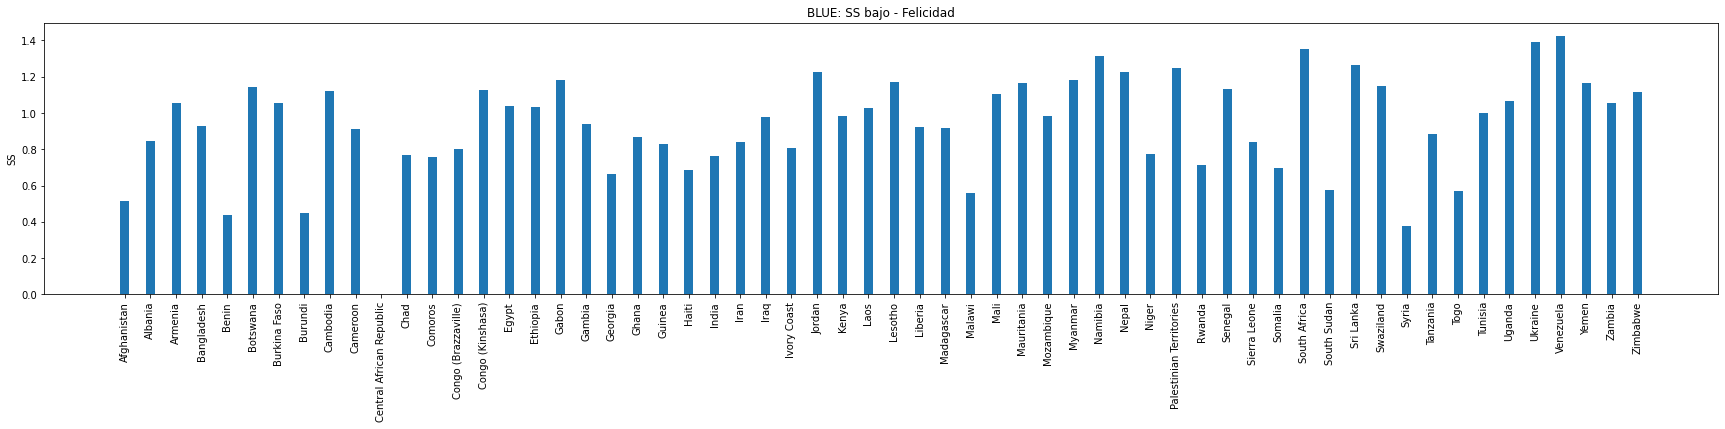

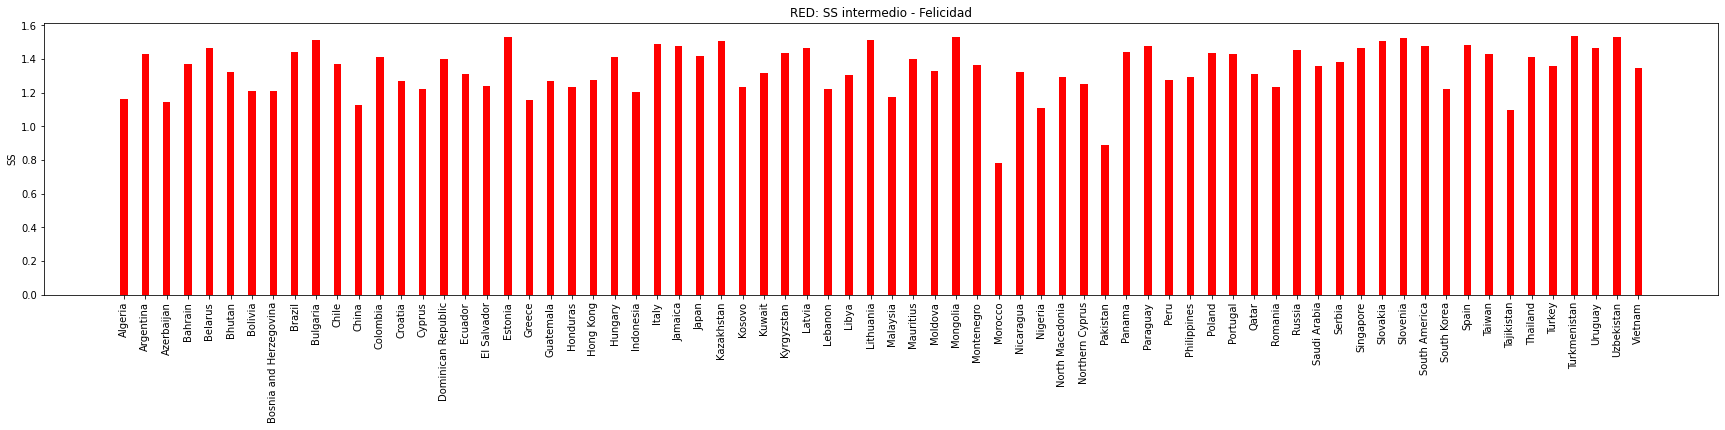

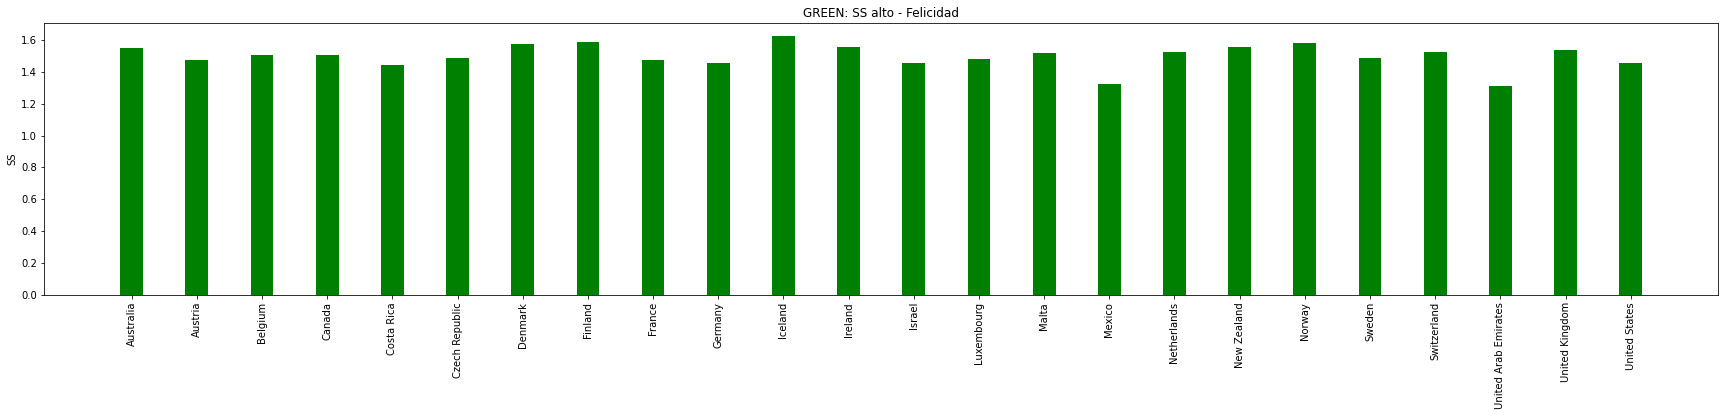

In [72]:
#BLUE
labels = data_blue_ss['Pais']
SS = data_blue_ss['Soporte_Social']
width = 0.35

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels, SS, width,  label='SS')

ax.set_ylabel('SS')
ax.set_title('BLUE: SS bajo - Felicidad')

#RED

labels = data_red_ss['Pais']
SS = data_red_ss['Soporte_Social']
width = 0.35

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels, SS, width,  label='SS', color='red')
ax.set_ylabel('SS')
ax.set_title('RED: SS intermedio - Felicidad')

#GREEN

labels = data_green_ss['Pais']
SS = data_green_ss['Soporte_Social']
width = 0.35

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels, SS, width,  label='SS',  color='green')

ax.set_ylabel('SS')
ax.set_title('GREEN: SS alto - Felicidad')

plt.show()

### Continentes en cada cluster - Soporte_Social

In [33]:
#BLUE
print('Número de paises, por continente - BLUE')
print(data_blue_ss.Continente.value_counts())
print('\n')

#RED
print('Número de paises, por continente - RED')
print(data_red_ss.Continente.value_counts())
print('\n')

#GREEN
print('Número de paises, por continente - GREEN')
print(data_green_ss.Continente.value_counts())
print('\n')

Número de paises, por continente - BLUE
Africa           38
Asia             15
Europe            2
South America     1
North America     1
Name: Continente, dtype: int64


Número de paises, por continente - RED
Asia             28
Europe           21
South America     9
North America     7
Africa            5
Name: Continente, dtype: int64


Número de paises, por continente - GREEN
Europe           16
North America     4
Asia              2
Oceania           2
Name: Continente, dtype: int64




## Comparando los resultados de PIB y SS en América



El objetivo es determinar que paises de América, tanto Norte (que incluye a Centroamérica) y Sur, tienen un GDP y Soporte_Social de **nivel medio y nivel alto**; es decir, estan ubicados dentro del RED y GREEN cluster para ambas variables, respectivamente. No consideraremos el nivel bajo (BLUE cluster) de estas variables, ya que estaremos trabajando con los paises más felicies de este continente.

**Para hacerlo**, por cada nivel: 
- Determinaremos que paises estan duplicados y eliminaremos una de las copias
- Eliminaremos aquellos paises que NO estén duplicados en ambos df (el de GDP y el de Soporte_Social) del nivel trabajado, al esto significar que no tienen tanto su GDP y Soporte_Social dentro del mismo nivel

### Paises con nivel Medio (RED cluster) de GDP y Soporte_Social

In [34]:
# PIB y SS Medio (RED) - América
red_america = pd.concat([data_red_gdp,data_red_ss])
red_america = red_america[red_america.Continente.isin(['North America', 'South America'])]

In [35]:
# Determinando que paises no tienen tanto un GDP como un Soporte_Social de nivel medio
red_america.drop_duplicates(keep=False)

,Ranking,Pais,Continente,Percepcion_Corrupcion,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Felicidad
25,26,Chile,South America,0.056,1.159,1.369,0.92,0.357,0.187,6.444


In [36]:
# Eliminando Chile y duplicados
red_america = red_america[red_america['Pais'] != 'Chile'].drop_duplicates()
red_america.drop_duplicates(keep=False)

,Ranking,Pais,Continente,Percepcion_Corrupcion,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Felicidad
46,47,Argentina,South America,0.050,1.092,1.432,0.881,0.471,0.066,6.086
60,61,Bolivia,South America,0.064,0.776,1.209,0.706,0.511,0.137,5.779
31,32,Brazil,South America,0.086,1.004,1.439,0.802,0.390,0.099,6.300
42,43,Colombia,South America,0.034,0.985,1.410,0.841,0.470,0.099,6.125
76,77,Dominican Republic,North America,0.101,1.015,1.401,0.779,0.497,0.113,5.425
49,50,Ecuador,South America,0.087,0.912,1.312,0.868,0.498,0.126,6.028
34,35,El Salvador,North America,0.074,0.794,1.242,0.789,0.430,0.093,6.253
26,27,Guatemala,North America,0.078,0.800,1.269,0.746,0.535,0.175,6.436
58,59,Honduras,North America,0.078,0.642,1.236,0.828,0.507,0.246,5.860
55,56,Jamaica,North America,0.028,0.831,1.478,0.831,0.490,0.107,5.890


### Paises con nivel Alto (GREEN cluster) de GDP y Soporte_Social

In [37]:
# PIB y SS Alto (Green) - América
green_america = pd.concat([data_green_gdp,data_green_ss])
green_america = green_america[green_america.Continente.isin(['North America', 'South America'])]

In [38]:
# Determinando que paises no tienen tanto un GDP como un Soporte_Social de nivel alto
green_america.drop_duplicates(keep=False)

,Ranking,Pais,Continente,Percepcion_Corrupcion,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Felicidad
25,26,Chile,South America,0.056,1.159,1.369,0.92,0.357,0.187,6.444


In [39]:
# Eliminando Chile y duplicados
green_america = green_america[green_america['Pais'] != 'Chile'].drop_duplicates()
green_america.drop_duplicates(keep=False)

,Ranking,Pais,Continente,Percepcion_Corrupcion,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Felicidad
8,9,Canada,North America,0.308,1.365,1.505,1.039,0.584,0.285,7.278
11,12,Costa Rica,North America,0.093,1.034,1.441,0.963,0.558,0.144,7.167
22,23,Mexico,North America,0.073,1.070,1.323,0.861,0.433,0.074,6.595
18,19,United States,North America,0.128,1.433,1.457,0.874,0.454,0.280,6.892


### Paises más felices de América

In [40]:
all_america = pd.concat([red_america, green_america]).drop_duplicates()
all_america.nlargest(10, columns='Felicidad')

,Ranking,Pais,Continente,Percepcion_Corrupcion,PIB,Soporte_Social,Expectativa_vida_saludable,Libertad_Expresion,Generosidad,Felicidad
8,9,Canada,North America,0.308,1.365,1.505,1.039,0.584,0.285,7.278
11,12,Costa Rica,North America,0.093,1.034,1.441,0.963,0.558,0.144,7.167
18,19,United States,North America,0.128,1.433,1.457,0.874,0.454,0.280,6.892
22,23,Mexico,North America,0.073,1.070,1.323,0.861,0.433,0.074,6.595
26,27,Guatemala,North America,0.078,0.800,1.269,0.746,0.535,0.175,6.436
30,31,Panama,North America,0.054,1.149,1.442,0.910,0.516,0.109,6.321
31,32,Brazil,South America,0.086,1.004,1.439,0.802,0.390,0.099,6.300
32,33,Uruguay,South America,0.150,1.124,1.465,0.891,0.523,0.127,6.293
34,35,El Salvador,North America,0.074,0.794,1.242,0.789,0.430,0.093,6.253
42,43,Colombia,South America,0.034,0.985,1.410,0.841,0.470,0.099,6.125


## Comparando métricas de paises de América

### PIB, Puntaje de Felicidad y Corrupción

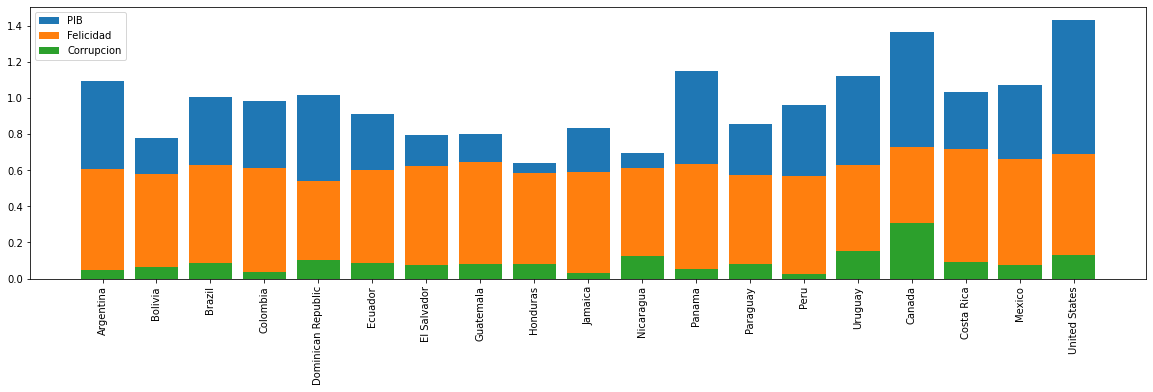

In [76]:
# Gráfica de barras
fig, ax = plt.subplots(figsize=(20,5))

plt.bar(all_america['Pais'], all_america['PIB'], label='PIB')
plt.bar(all_america['Pais'], all_america['Felicidad']/10, label='Felicidad')
plt.bar(all_america['Pais'], all_america['Percepcion_Corrupcion'], label='Corrupcion')


plt.xticks(rotation=90)


plt.legend()
plt.show()

## Histórico de paises del mundo

In [42]:
# importando data del 2015 al 2019
d15 = pd.read_csv('2015.csv')
d16 = pd.read_csv('2016.csv')
d17 = pd.read_csv('2017.csv')
d18 = pd.read_csv('2018.csv')
d19 = pd.read_csv('2019.csv')

d15['Year'] = '2015'
d16['Year'] = '2016'
d17['Year'] = '2017'
d18['Year'] = '2018'
d19['Year'] = '2019'

# El nombre y orden de las columnas es diferente en cada dataset 
d15 = d15.iloc[:, [0,3,5,9,-1]]
d16 = d16.iloc[:, [0,3,6,10,-1]]
d17 = d17.iloc[:, [0,2,5,10,-1]]
d18 = d18.iloc[:, [1,2,3,8,-1]]
d19 = d19.iloc[:, [1,2,3,8,-1]]

col_names = ['pais','felicidad','pib','corrupcion','year']
d15.columns = col_names
d16.columns = col_names
d17.columns = col_names
d18.columns = col_names
d19.columns = col_names

In [43]:
all_years = pd.concat([d15, d16, d17, d18, d19])
all_years['Continente'] = all_years['pais'].apply(get_continent)

# Se divide el puntaje de felicidad (happiness) 
# y el GDP (PID) entre 100 y 10, respectivamente, para una mejor visualización de la data al graficarla
all_years['felicidad'] = all_years['felicidad']/100
all_years['pib'] = all_years['pib']/10

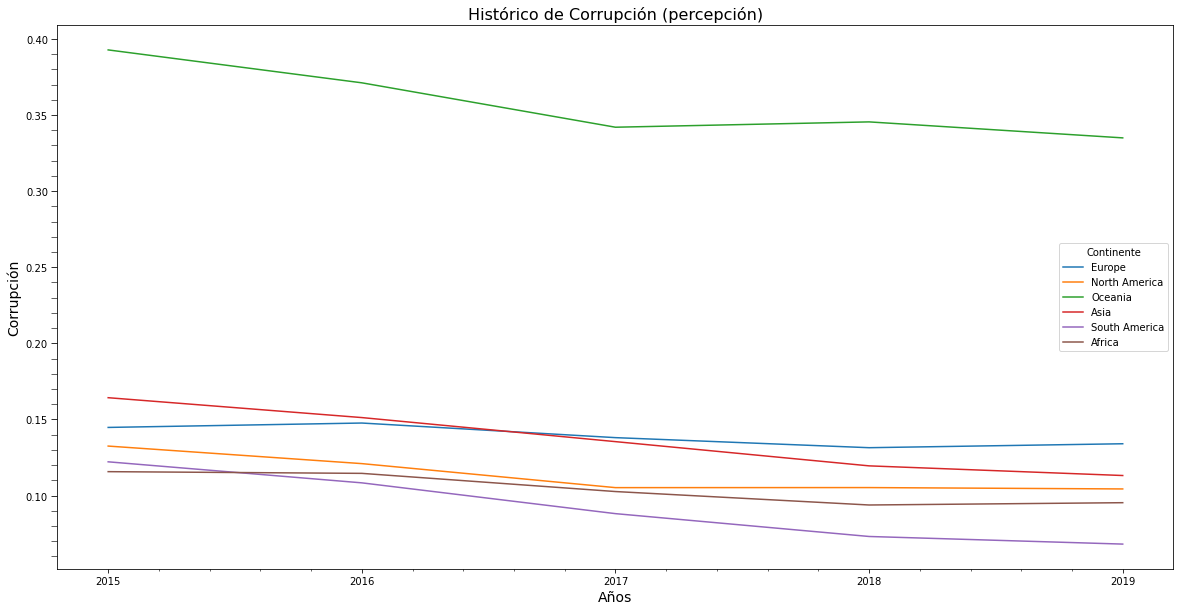

In [78]:
fig = plt.subplots(figsize=(20,10))
sns.lineplot(data=all_years, x="year", y="corrupcion", hue="Continente", ci=None)
plt.title("Histórico de Corrupción (percepción)", fontsize=16)
plt.xlabel("Años", fontsize=14)
plt.ylabel("Corrupción", fontsize=14)
plt.minorticks_on()
plt.tick_params(axis='y', which='both', length=6)

Ya que Oceania solo cuenta con 2 paises, excluiremos este continente de nuestra gráfica.

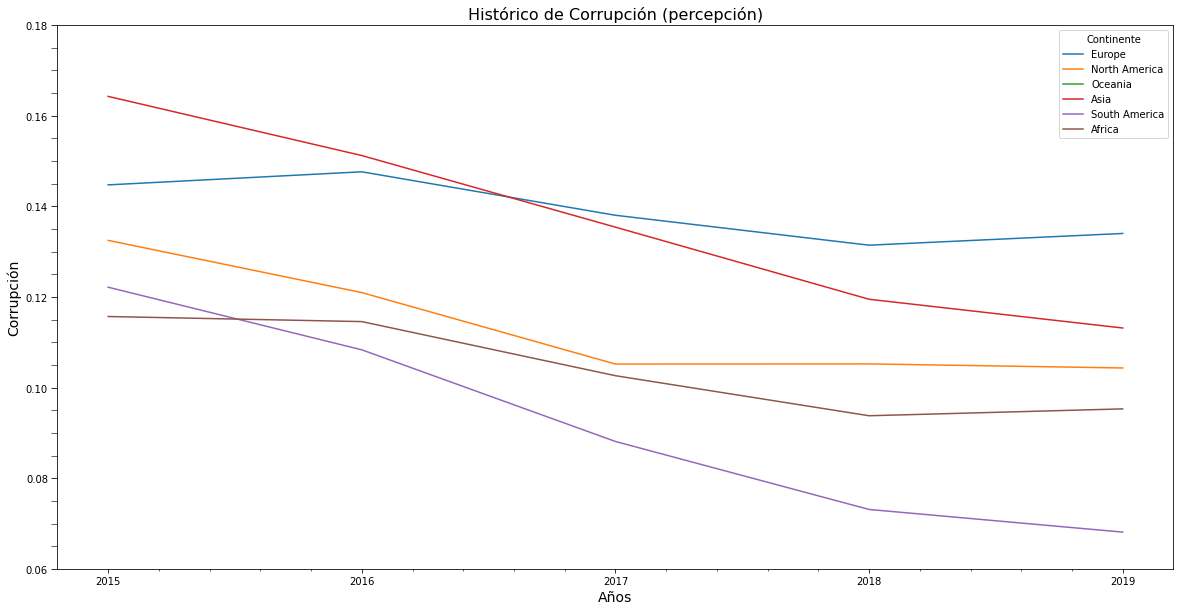

In [45]:
fig = plt.subplots(figsize=(20,10))
sns.lineplot(data=all_years, x="year", y="corrupcion", hue="Continente", ci=None)
plt.title("Histórico de Corrupción (percepción)", fontsize=16)
plt.xlabel("Años", fontsize=14)
plt.ylabel("Corrupción", fontsize=14)
plt.ylim(0.06,0.18)
plt.minorticks_on()
plt.tick_params(axis='y', which='both', length=6)

In [79]:
# Función para comparar la Falicidad, la percepción de Corrupción y el GDP 

def hcg(country):
  fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

  # Gráfica de felicidad
  sns.lineplot(data=all_years[all_years['pais']==country], x="year", y="felicidad", ci=None, color="blue", label="Felicidad",ax=ax1 )

  # Gráfica de corrupción
  sns.lineplot(data=all_years[all_years['pais']==country], x="year", y="corrupcion", ci=None, color="green", label = "Corrupción",ax=ax2)

  # Gráfica de PIB
  sns.lineplot(data=all_years[all_years['pais']==country], x="year", y="pib", ci=True, color="red", label = "PIB",ax=ax3)

  ax1.set(ylabel=None, xlabel=None)
  ax2.set(ylabel=None, xlabel=None)
  ax3.set(ylabel=None, xlabel=None)

### Panama

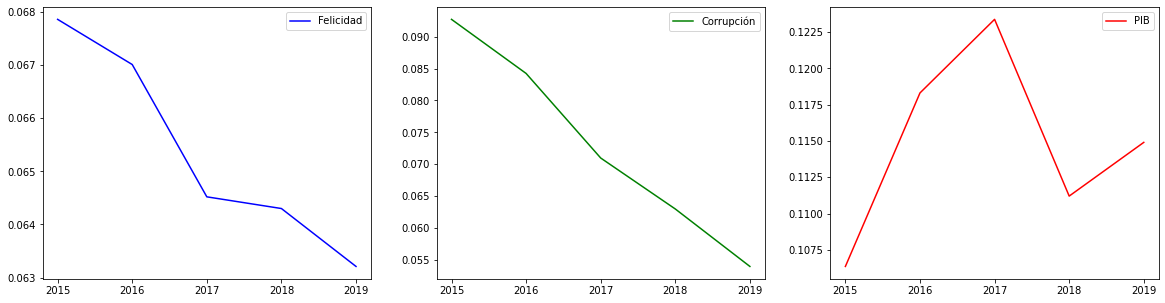

In [47]:
hcg('Panama')

### Venezuela

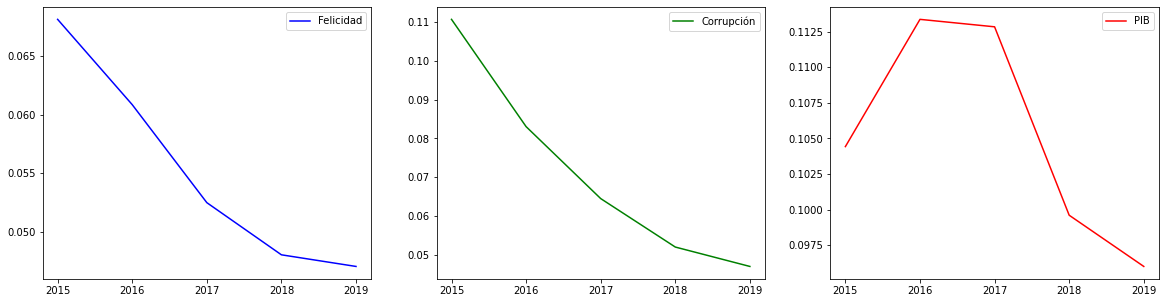

In [48]:
hcg('Venezuela')

### Costa Rica

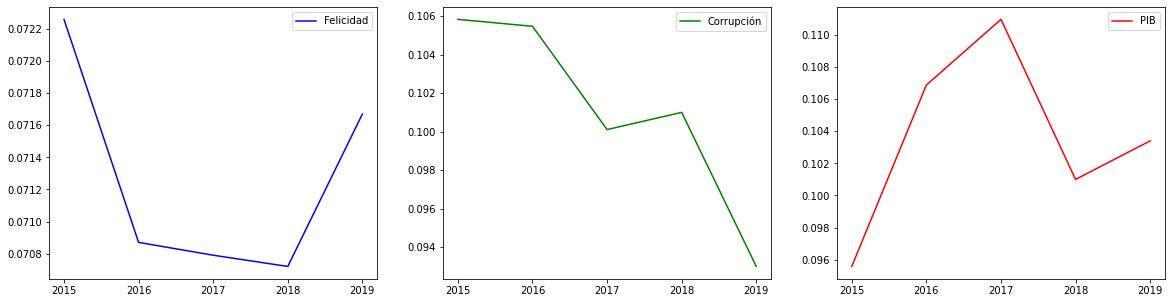

In [49]:
hcg('Costa Rica')

### Estados Unidos

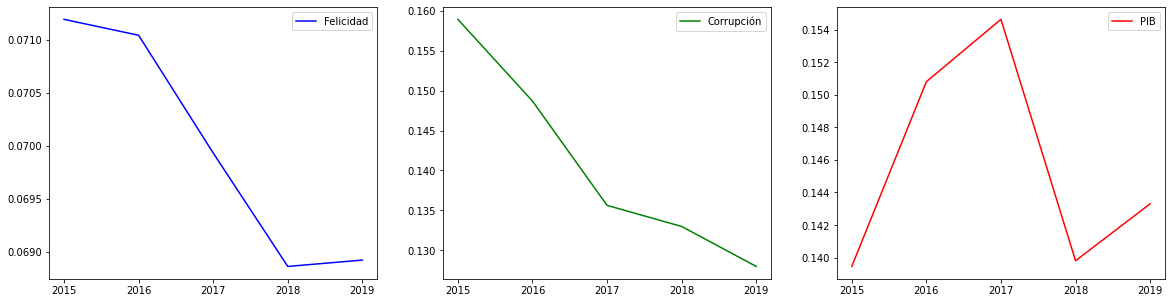

In [50]:
hcg('United States')

### Canada

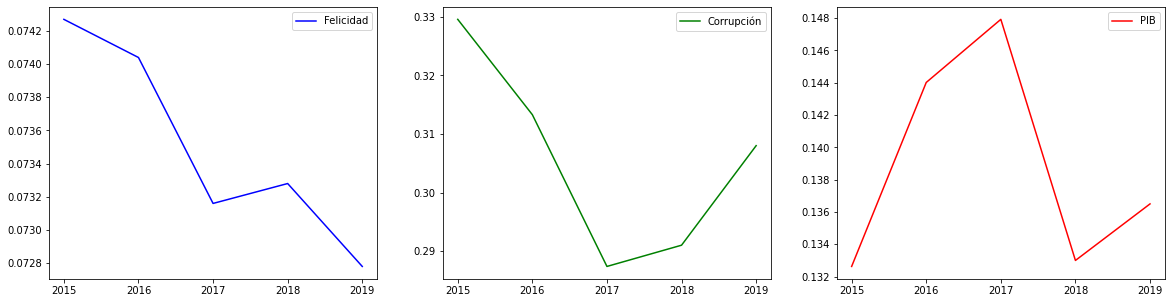

In [51]:
hcg('Canada')

### Argentina

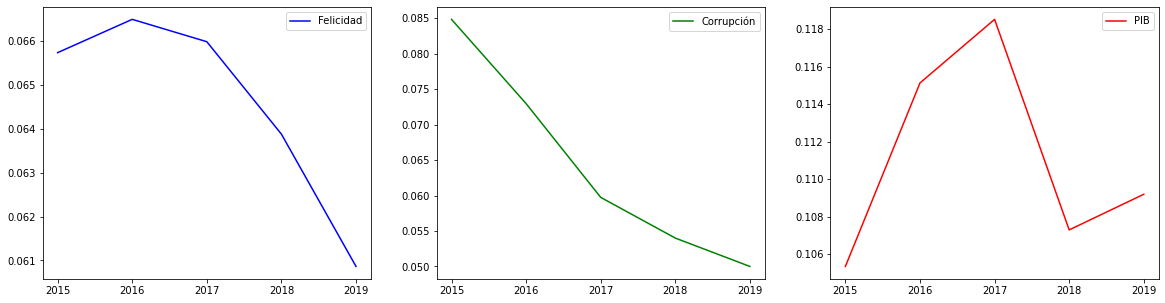

In [52]:
hcg('Argentina')

### Otro?

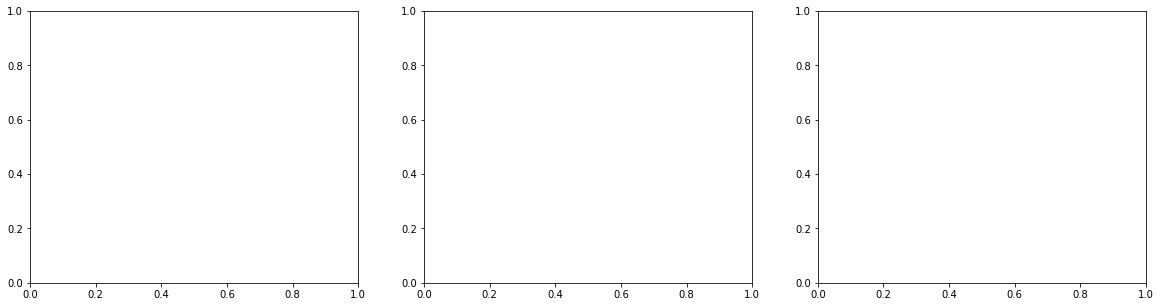

In [53]:
hcg('')